Regression Task: This dataset contains a variety of laptop specifications and the price of each device in Euros, the goal is to create a machine learning model to train the model to predict laptop prices.
Algorithms: Linear Regression, Logistic Regression, Decision Tree.
Dataset name: laptop_price.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [ ]:
# Load the dataset
df = pd.read_csv("C:\\Users\\cse\\Downloads\\laptop_price (2).csv")

In [ ]:
df.head()


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [ ]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.0
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.0
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.0
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.0
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel,Celeron Dual Core N3050,1.6,4,500GB HDD,Intel,HD Graphics,Windows 10,2.20,369.0


In [ ]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [ ]:
df.shape

(1275, 15)

In [ ]:
print("\nMissing values in each column: ")
print(df.isnull().sum())


Missing values in each column: 
Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64


In [ ]:
print("\nDubplicate rows: ")
print(df[df.duplicated()])
#Remove duplicates
df.drop_duplicates(inplace=True)


Dubplicate rows: 
Empty DataFrame
Columns: [Company, Product, TypeName, Inches, ScreenResolution, CPU_Company, CPU_Type, CPU_Frequency (GHz), RAM (GB), Memory, GPU_Company, GPU_Type, OpSys, Weight (kg), Price (Euro)]
Index: []


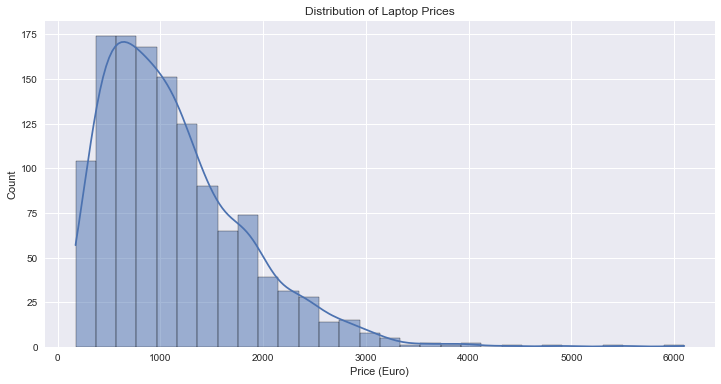

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df['Price (Euro)'], bins=30, kde=True)
plt.title('Distribution of Laptop Prices')
plt.show()

<AxesSubplot:>

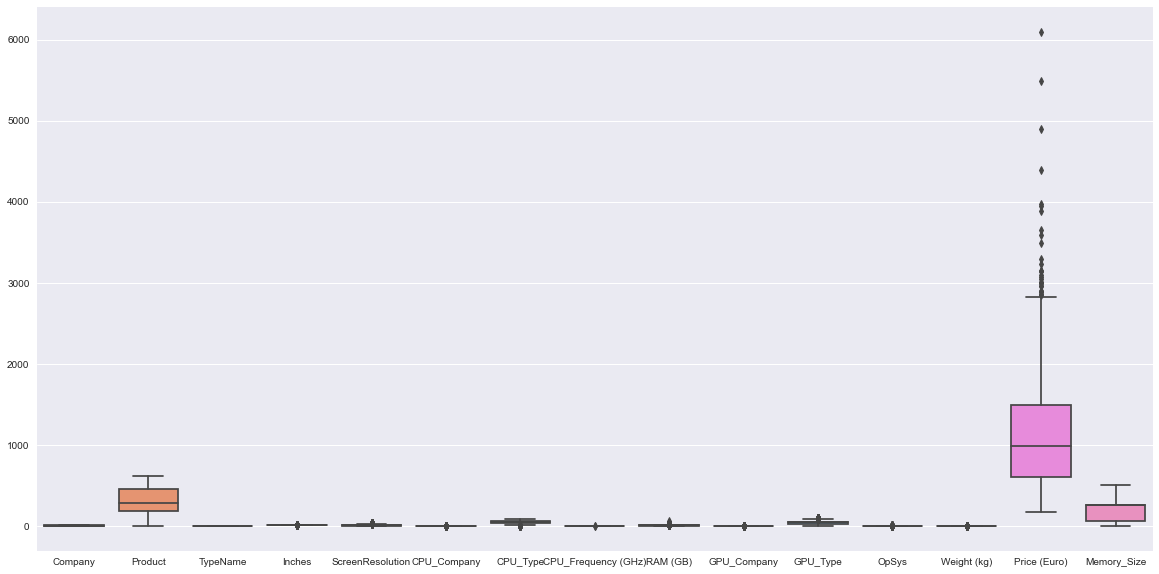

In [ ]:
#Removing Outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

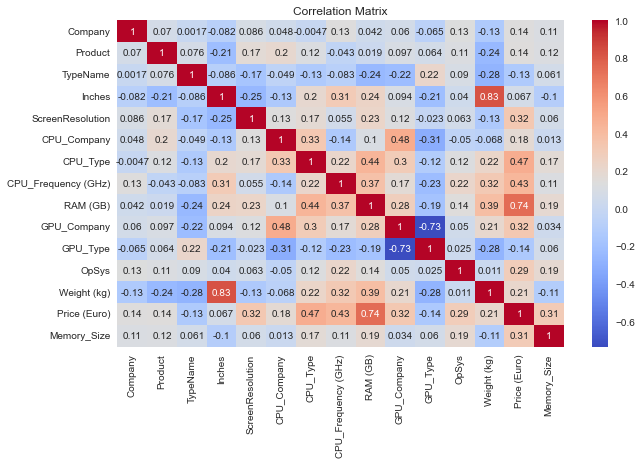

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

In [ ]:
# Print column names to check if 'Memory' exists
print(df.columns)



Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)',
       'Memory_Size'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Since 'Memory_Size' already exists, we can skip processing 'Memory' again.

# Encode remaining categorical variables
encoder = LabelEncoder()
categorical_columns = ['Company', 'Product', 'TypeName', 'ScreenResolution',
                       'CPU_Company', 'CPU_Type', 'GPU_Company', 'GPU_Type',
                       'OpSys']

for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Splitting data into features (X) and target (y)
X = df.drop('Price (Euro)', axis=1)
y = df['Price (Euro)']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X



,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),GPU_Company,GPU_Type,OpSys,Weight (kg),Memory_Size
0,1,300,4,13.3,23,1,40,2.30,8,2,56,8,1.370,128
1,1,301,4,13.3,1,1,40,1.80,8,2,50,8,1.340,128
2,7,50,3,15.6,8,1,46,2.50,8,2,52,4,1.860,256
3,1,300,4,15.4,25,1,54,2.70,16,0,76,8,1.830,512
4,1,300,4,13.3,23,1,40,3.10,8,2,57,8,1.370,256
5,0,58,3,15.6,0,0,11,3.00,4,0,84,5,2.100,500
6,1,300,4,15.4,25,1,54,2.20,16,2,58,3,2.040,256
7,1,301,4,13.3,1,1,40,1.80,8,2,50,8,1.340,256
8,2,608,4,14.0,8,1,70,1.80,16,3,37,5,1.300,512
9,0,430,4,14.0,15,1,53,1.60,8,2,105,5,1.600,256


In [ ]:
y

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
5        400.00
6       2139.97
7       1158.70
8       1495.00
9        770.00
10       393.90
11       344.99
12      2439.97
13       498.90
14      1262.40
15      1518.55
16       745.00
17      2858.00
18       499.00
19       979.00
20       191.90
21       999.00
22       258.00
23       819.00
24       659.00
25       418.64
26      1099.00
27       800.00
28      1298.00
29       896.00
30       244.99
31       199.00
32       439.00
33      1869.00
34       998.00
35       249.00
36       367.00
37       979.00
38       488.69
39       879.00
40       389.00
41      1499.00
42       522.99
43       682.00
44       999.00
45      1419.00
46       369.00
47      1299.00
48       639.00
49       466.00
50       319.00
51       841.00
52       398.49
53      1103.00
54       384.00
55       767.80
56       439.00
57       586.19
58      2449.00
59       415.00
60      1299.00
61       879.00
62      

Apply Regression Algorithms
a) Linear Regression

In [ ]:
# Select features and target variable
X = df.drop(['Price (Euro)'], axis=1)  # Adjust according to your dataset
y = df['Price (Euro)']


# Convert categorical variables
X = pd.get_dummies(X, drop_first=True)



# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)



# Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Decision Tree Regression Model
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)


DecisionTreeRegressor()

In [ ]:

# 3. Performance Evaluation
# Predictions
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")

evaluate_model(y_test, y_pred_lr, 'Linear Regression')
evaluate_model(y_test, y_pred_dt, 'Decision Tree')


Linear Regression - MAE: 275.83, MSE: 148872.15, R²: 0.71
Decision Tree - MAE: 241.14, MSE: 164285.43, R²: 0.68


In [ ]:
# 4. Hyperparameter Tuning
# Decision Tree Hyperparameter Tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


In [ ]:
# Evaluate the best model
y_pred_best_dt = best_model.predict(X_test)
evaluate_model(y_test, y_pred_best_dt, 'Best Decision Tree')


Best Decision Tree - MAE: 234.49, MSE: 152462.41, R²: 0.70
